<a href="https://colab.research.google.com/github/Kevincancino26/mis-notebook-de-estudio-/blob/main/IA_aumentada_previsi%C3%B3n_de_atraso_de_vuelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='skayblue'> Proyecto

utilizaremos datos de vuelo de un areopuerto esto lo que ahce es generar costos para las empresas y los pasajeros, este proyecto es para prever los atrasos en los vuelos y se puede optimizar las operaciones aereo portuaria, y tengan una mejora en los procesos y costos operativos

el problema: consiste en tratar de tener una prevision del atraso de los vuelos, para optizar los procesos operativos de los vuelos, nos enfocaremso en desarrollar un modelo para prevenir los atrasos en el mejot tiempo posible, es decir tener un margen de tiempo en un periodo para determinar si el vuelo saldra en ese horario y mejorando la experiencia del usuario y reduciendo costos de la aelorinia

Bibliotecas a usar

En este curso, vamos a aprender cómo construir un modelo de regresión para predecir los retrasos en vuelos. Para ello, utilizaremos las bibliotecas Pandas, NumPy, scikit-learn, Seaborn y Yellowbrick en las siguientes versiones:

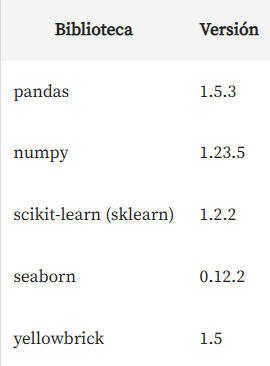

El código a continuación imprime las versiones de las bibliotecas:



```
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')
```




En este archivo CSV, encontrarás el material con los datos que vamos a trabajar durante el curso.
https://github.com/Kevincancino26/mis-notebook-de-estudio-/blob/main/IA_aumentada_previsi%C3%B3n_de_atraso_de_vuelo/flights.csv

#<font color='skayblue'> Explorando los datos

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2


In [ ]:
df_vuelos=pd.read_csv('/content/flights.csv')

In [ ]:
df_vuelos.shape

(71175, 11)

In [ ]:
#delay esta es minutos y segundos
round(.88*60)

53

In [ ]:
df_vuelos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
df_vuelos.info()#metadatos(la infromacion de los datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
df_vuelos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


Al revsar los datos descriptivos podemos darnos una idea de la distribucion y los tiempos de retraso que tenemos en nuestros vuelos con la varibale respuesta, viendo que tenemos que el 25% de mis vuelos salen hasta 4 minutos antes, y que el maximo de mis vuelos salen hasta 1 hora y 25 minutos tarde

In [ ]:
df_vuelos.describe(include='object')#nos da la estadistica descriptiva de las variables gategoricas

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


podemos visualisar el conjunto de datos categoricos, donde vemos la cantidad de valores, los datos de cada una de las columnas y el dato que mas se repite con su frecuencia de este, por ejemplo: la aerolinea se repite el BZ con una frecuencia de 47.598

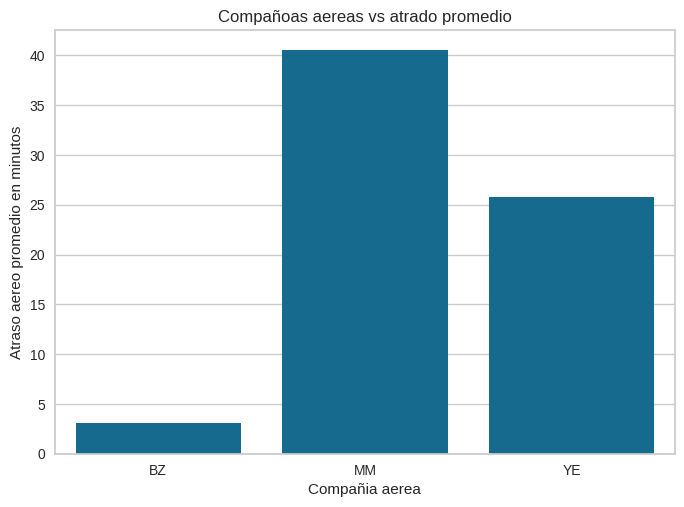

In [ ]:
print('\n')
avg_daley=df_vuelos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline',y='delay',data=avg_daley)
plt.title('Compañoas aereas vs atrado promedio')
plt.xlabel('Compañia aerea')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()
print('\n')


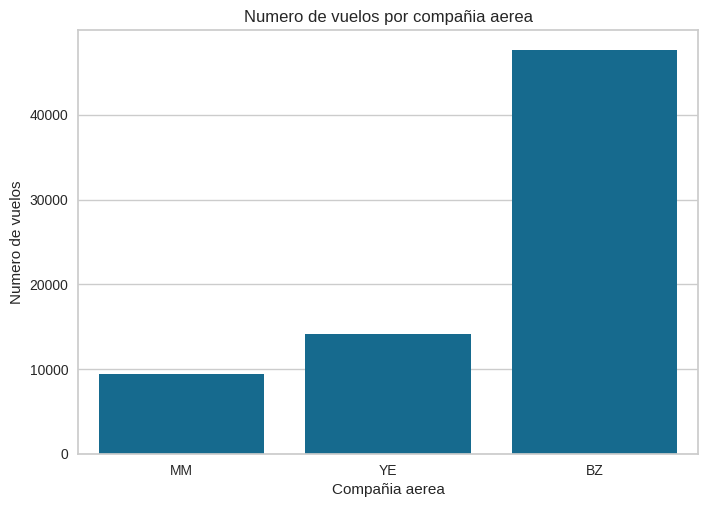

In [ ]:
#vamos a crear el numero de vuelos por comañia aeria
sns.countplot(df_vuelos,x='airline')
plt.title('Numero de vuelos por compañia aerea')
plt.xlabel('Compañia aerea')
plt.ylabel('Numero de vuelos')
plt.show()

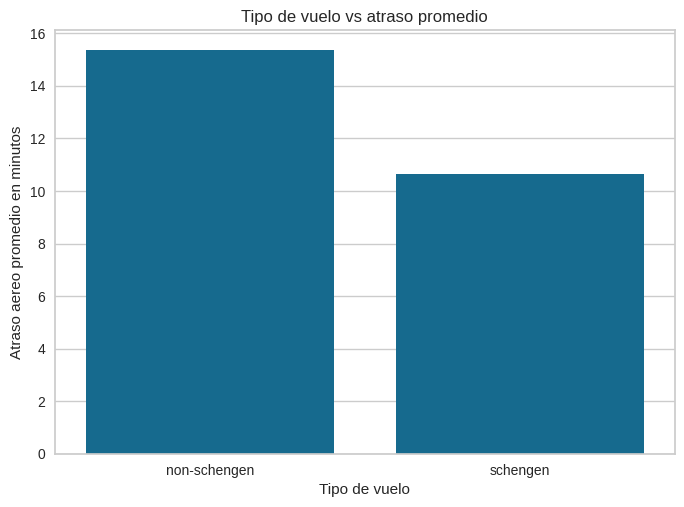

In [ ]:
#cantidad de atraso promedio si es espacio schangen o no
avg_daley=df_vuelos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen',y='delay',data=avg_daley)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()


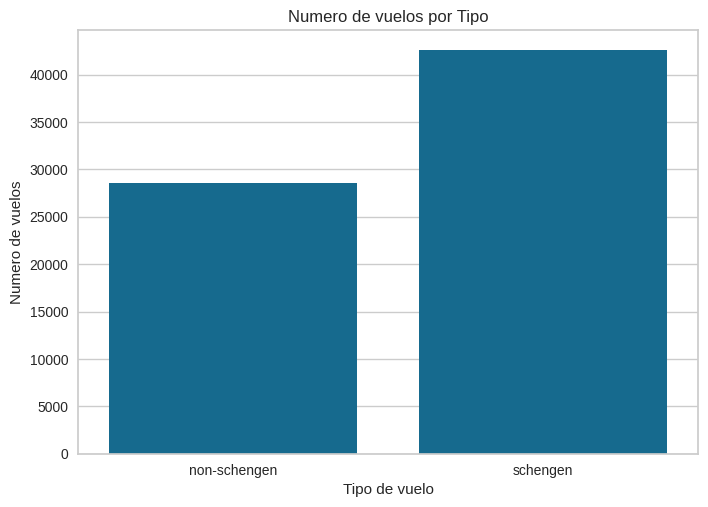

In [ ]:
print('\n')


sns.countplot(df_vuelos,x='schengen')
plt.title('Numero de vuelos por Tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Numero de vuelos')
plt.show()

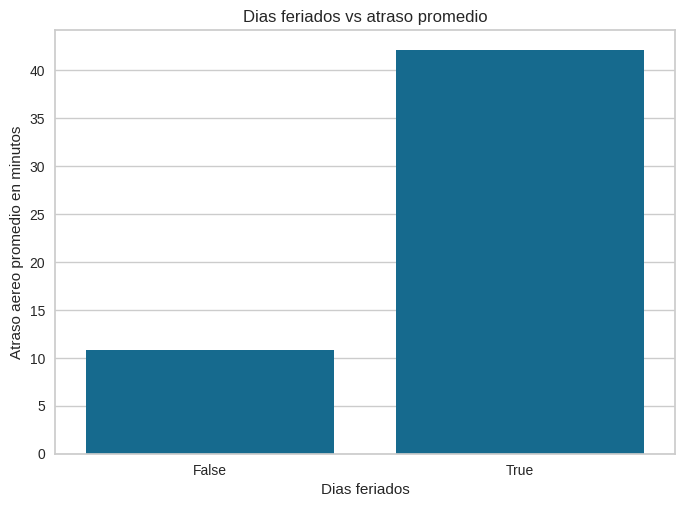

In [ ]:
#atrasos sis son dias feriados o no
avg_daley=df_vuelos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday',y='delay',data=avg_daley)
plt.title('Dias feriados vs atraso promedio')
plt.xlabel('Dias feriados')
plt.ylabel('Atraso aereo promedio en minutos')
plt.show()

In [ ]:
order=df_vuelos['aircraft_type'].value_counts().index
order

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

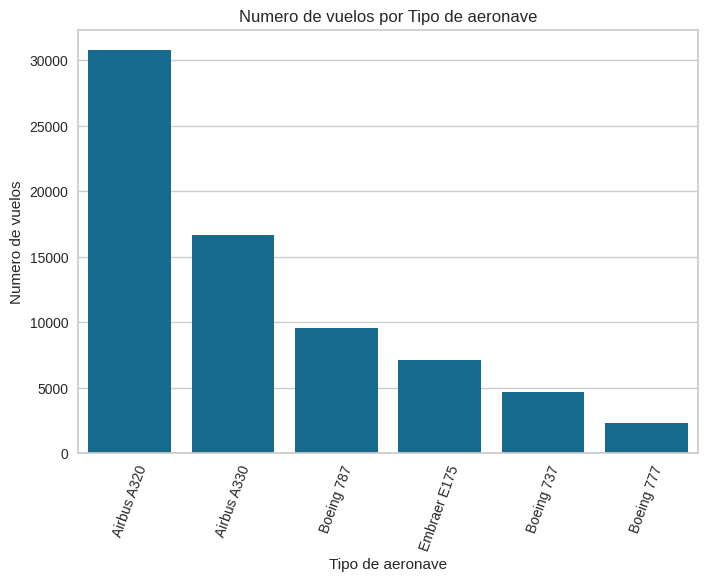

In [ ]:
#cantidad de aeronaves por aeropuerto
order=df_vuelos['aircraft_type'].value_counts().index
sns.countplot(df_vuelos,x='aircraft_type',order=order)
plt.title('Numero de vuelos por Tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Numero de vuelos')
plt.show()

con esto vemos como esta el comportamiento de nuestros datos con respecto a la variable respuesta asi como cantidades y retrasos

analisis de la distribucion de datos mediante un histograma, concentrandonos en  el horario de los vuelos, salida de los vuelos, llegada de los vuelos y atraso de los vuelos

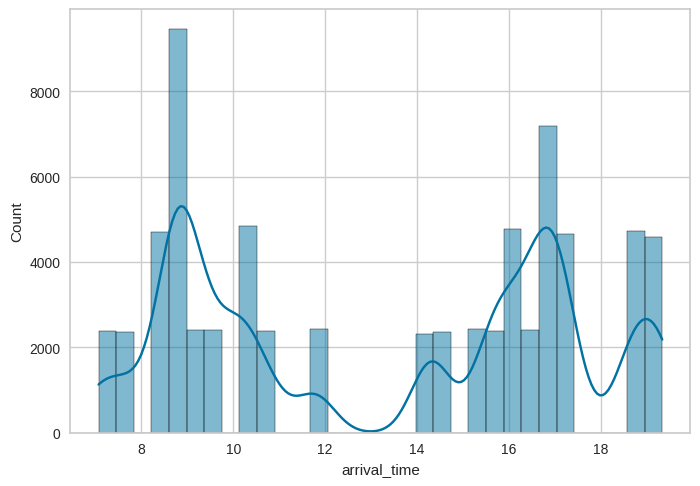

In [ ]:
sns.histplot(df_vuelos,x='arrival_time',kde=True);

es decficl determinar un analisis con el ancho de los bins, por lo tanto nos podemos apoyar en la regla de friman diaconis que nos dice que el ancho de los bins es igual a 2 veces el valor intercuantil dibidido entre la raiz cubica de la cantidad de observaciones. nos da el valor ideal para seleccionar el ancho de lso bins en un histograma

https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

In [ ]:
#funcion que recrea la formula anterior dicha y ayuda a estbalecer el rango intercuantil
def ancho_bin(df,columna):
  q75,q25=np.percentile(df[columna],[75,25])
  iqr=q75-q25
  ancho=2 * iqr * np.power(len(df[columna]),-1/3)
  return ancho

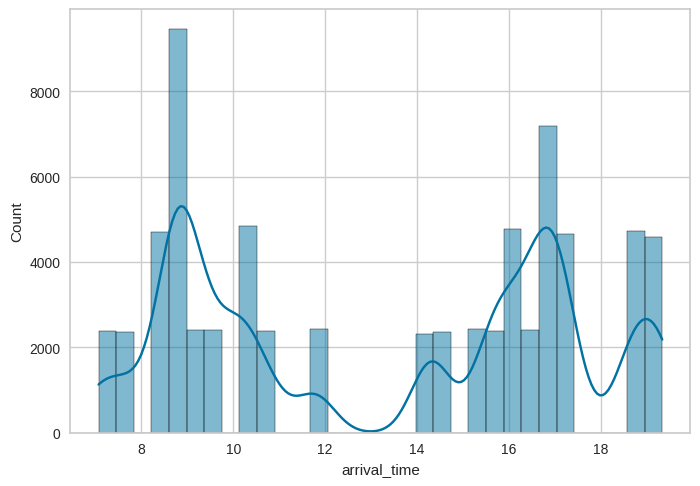

In [ ]:
binwidth= ancho_bin(df_vuelos,'arrival_time')
sns.histplot(df_vuelos,x='arrival_time',kde=True,binwidth=binwidth);

en este grafico aunqu es parecido, usamos un modo mas matematico para el establecimiento de bins igualmente se podria hacer manueal notando una diferencia

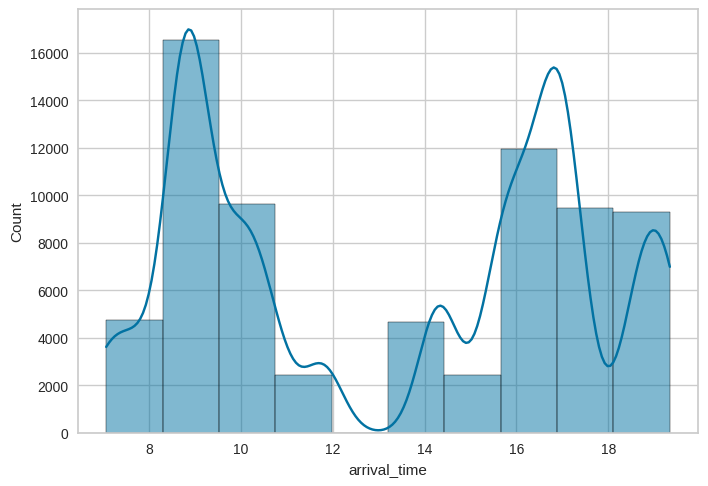

In [ ]:
sns.histplot(df_vuelos,x='arrival_time',kde=True,bins=10);

al ver la grafica notamos que la curba queda fuera por los bins al azar esto nos da a entender que la mejor opcion es siempre usar un metodo mas adecuado para la exactitud de uso del ancho de los bins

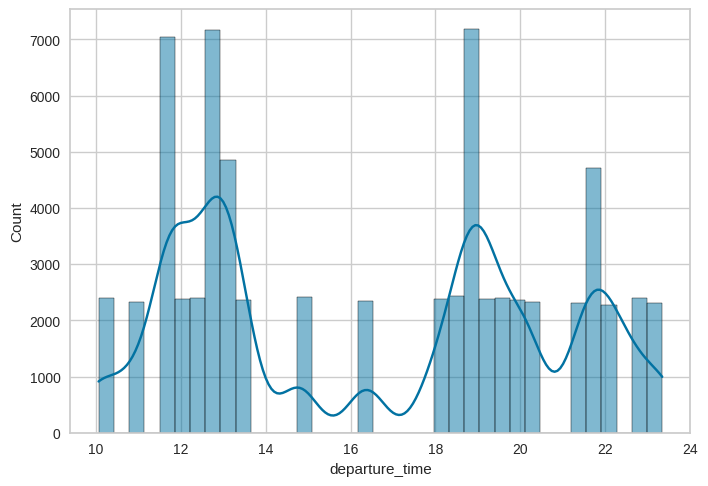

In [ ]:
#horario de salida
binwidth= ancho_bin(df_vuelos,'departure_time')
sns.histplot(df_vuelos,x='departure_time',kde=True,binwidth=binwidth);

al comparar el horario de llegada con el de salida podemos apreciar una distribucion bimodal, peor nos interesa el grafico de distribucion de los retrasos de los vuelos

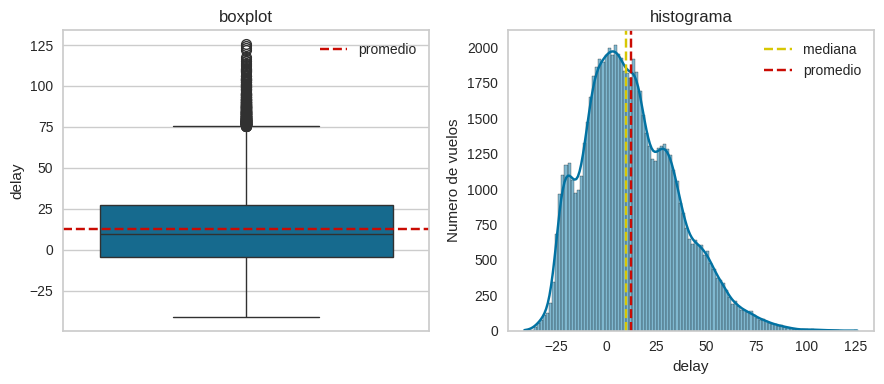

In [ ]:
atraso_promedio=df_vuelos['delay'].mean()
atraso_mediana=df_vuelos['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.boxplot(data=df_vuelos, y='delay', ax=ax[0])
ax[0].set_title('boxplot')
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label='promedio')
ax[0].legend()

binwidth = ancho_bin(df_vuelos, 'delay')
sns.histplot(data=df_vuelos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Numero de vuelos')
plt.grid(False)
ax[1].set_title('histograma')
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label='mediana')
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label='promedio')
ax[1].legend()
plt.tight_layout()
plt.show()

A la izquierda, tendremos nuestro boxplot para observar la distribución, y a la derecha, el histograma, que también nos ayuda en esta observación. Un gráfico de violín, por ejemplo, nos permite ver la distribución y, en su interior, el boxplot. Sin embargo, debido a la dificultad de interpretación del gráfico de violín, optamos por el boxplot y el histograma.

En el boxplot, observamos que la mediana está alrededor de 10 minutos y el promedio alrededor de 12 minutos. Recordando nuestro método describe en pandas, la mediana era de aproximadamente 9 minutos y 45 segundos, y el promedio de 12 minutos y 30 segundos.

El valor mínimo era de 41 minutos de adelanto del vuelo y el máximo de 125 minutos. Estos 125 minutos son considerados outliers o observaciones atípicas. El valor máximo que realmente consideramos en el boxplot es de alrededor de 75 minutos de atraso, y el mínimo de 44 minutos, que fue el adelanto del vuelo.

La distribución en el histograma muestra que el promedio y la mediana están muy cercanos, lo que indica una distribución cercana a la normal.

lo que aprendimos

En esta clase, aprendiste a:
* Analizar las estadísticas descriptivas de los datos;
* Obtener información relevante de los datos, como la cantidad de datos nulos y el tipo de las columnas;
* Construir el análisis gráfico de los datos;
* Construir la visualización gráfica de la distribución de los datos.

#Feature engineering

ahora vamos a proceer a generar nuevos atributos dado que esto se le conoce como feature engineering o ingenieria de atributos

In [ ]:
df_vuelos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

al observar nuestras columnas y datos no tenemos una columna fecha pero si de dia y años donde nos podemos basar para crearla dado que en dia estmaos en 0 y el maximo es 364

In [ ]:
#creacion de la columna diaz
df_vuelos['date']=df_vuelos['year'].astype(str)+'-'+(df_vuelos['day']+1).astype(str)#se pone mas uno dado que tenemos que iniciar desde el dia 1 por el metodo daytime y en la columna iniciamos en 0
df_vuelos['date']=pd.to_datetime(df_vuelos['date'],format='%Y-%j')#usando el metodod e pandas to_datatime y el formato %Y-%j basicamente toma el uno y lo vuelve primero de enor y asi con cada numero hasta el 365
df_vuelos.head(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01


In [ ]:
df_vuelos['date'].tail(2)

,date
71173,2022-12-31
71174,2022-12-31


ya que tenemos nuestra columna vamos a determinar una columna si nos permite saber si es fin de semana o no

In [ ]:
# con dt.weekday.isin se detectara los dias que esten entre 5 y 6, dado que los dias se empiezan a contar desde 0 (lunes)
# isin aisla si es si o no de acuerdo a los valores que especifiquemos en la lista
df_vuelos['is_weekend'] = df_vuelos['date'].dt.weekday.isin([5, 6])

# Usamos .dt.day_name() para obtener el nombre del día
df_vuelos['day_name'] = df_vuelos['date'].dt.day_name()

df_vuelos[['date', 'is_weekend', 'day_name']].sample(10)

,date,is_weekend,day_name
29884,2015-06-17,False,Wednesday
18192,2013-04-28,True,Sunday
971,2010-03-06,True,Saturday
736,2010-02-19,False,Friday
70120,2022-10-22,True,Saturday
70919,2022-12-14,False,Wednesday
40593,2017-06-01,False,Thursday
34470,2016-04-18,False,Monday
1151,2010-03-18,False,Thursday
28556,2015-03-20,False,Friday


####¿Que es el feature engineering?

El feature engineering es un concepto fundamental en el campo de la ciencia de datos y el aprendizaje automático, y desempeña un papel crucial en el proceso de desarrollo de modelos predictivos y analíticos. Esta técnica implica la creación, transformación y selección de variables, también conocidas como "features", a partir de los datos brutos disponibles, con el fin de mejorar el rendimiento de los modelos. Pero, ¿qué serían features?

**¿Qué son las features?**

Las features son las variables o atributos que un modelo de machine learning utiliza para hacer predicciones o clasificaciones. Representan la información que el modelo tiene a su disposición para aprender patrones en los datos. Por ejemplo, si estamos construyendo un modelo para predecir el precio de una casa, las features pueden incluir el número de habitaciones, la superficie en metros cuadrados, la ubicación geográfica, la proximidad a escuelas, entre otras.

**La importancia del Feature Engineering:**

* Mejora el rendimiento del modelo: Elegir las features correctas y transformarlas adecuadamente puede resultar en modelos más precisos y eficientes. Features bien diseñadas pueden capturar información relevante y eliminar ruido en los datos.

* Reduce la dimensionalidad: En conjuntos de datos con muchas features, la dimensionalidad de los datos puede convertirse en un problema. El feature engineering puede ayudar a reducir la cantidad de features, manteniendo solo aquellas que son realmente informativas para el modelo.

**Técnicas de Feature Engineering:**

Existen varias técnicas de feature engineering, incluyendo:

* Creación de features: Esto implica la creación de nuevas features basadas en las existentes. Por ejemplo, combinar las features de superficie y valor de una propiedad para crear una feature que represente el valor por metro cuadrado de esa propiedad. O, si tienes datos de fecha y hora, puedes crear una nueva característica que represente el día de la semana. Esto puede ser útil porque tal vez haya patrones que ocurren en días específicos de la semana.

* Transformación de features: Se pueden aplicar funciones matemáticas a las features existentes para hacerlas más adecuadas para el modelo. Ejemplos incluyen aplicar logaritmos o escalar valores para reducir la escala en la que se encuentra la variable.
Selección de features: No todas las features son igualmente importantes. La selección de features implica identificar y mantener solo las más relevantes para el problema en cuestión.

en una forma mas resumida:

***La Feature engineering es un proceso que implica la creación, transformación y selección de variables a partir de datos en bruto. El objetivo es mejorar la precisión del modelo, proporcionando información más significativa y relevante.***

## Feature encoding

los modelos de machine learnin tabajan mejor con datos codificados y no con datos str, cadenas de caracteres, bool, etc

In [ ]:
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

se tiene que hacer esta codificacion por pasos, primero con las que tienen dos categorias

In [ ]:
df_vuelos['schengen']=df_vuelos['schengen'].replace({'non-schengen':0,'schengen':1})
df_vuelos['is_holiday']=df_vuelos['is_holiday'].replace({False:0,True:1})
df_vuelos['is_weekend']=df_vuelos['is_weekend'].replace({False:0,True:1})
df_vuelos.sample(3)

/tmp/ipython-input-4127335598.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vuelos['schengen']=df_vuelos['schengen'].replace({'non-schengen':0,'schengen':1})
/tmp/ipython-input-4127335598.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vuelos['is_holiday']=df_vuelos['is_holiday'].replace({False:0,True:1})
/tmp/ipython-input-4127335598.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
46767,24,BZ,Airbus A320,1,FJB,9.668655,12.668655,197,2018,0,7.463101,2018-07-17,0,Tuesday
1882,2,BZ,Airbus A320,1,ZQO,19.196804,22.196804,125,2010,0,18.925532,2010-05-06,0,Thursday
5247,18,BZ,Airbus A320,1,TZF,14.258911,20.258911,349,2010,0,16.095432,2010-12-16,0,Thursday


ahora vamoa a codigifcar las variables catergoricas

In [ ]:
categoricas=['airline','aircraft_type','origin','day_name']
#vamos a usar un metodo de pandas que nos permite codificar nuestras variables con 0 y 1 de forma numera metodo get_dommies
pd.get_dummies(data=df_vuelos,columns=categoricas,dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
datos_codificados=pd.get_dummies(data=df_vuelos,columns=categoricas,dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
19127,23,1,18.801235,21.801235,180,2013,0,15.343206,2013-06-30,1,...,1,0,0,0,0,0,1,0,0,0
40987,22,0,8.794147,11.794147,177,2017,1,46.394118,2017-06-27,0,...,0,0,0,0,0,0,0,0,1,0
2882,1,0,15.496519,18.496519,192,2010,0,10.054511,2010-07-12,0,...,0,0,0,0,1,0,0,0,0,0
63001,17,0,16.718722,21.718722,185,2021,1,17.395856,2021-07-05,0,...,0,0,0,0,1,0,0,0,0,0
25824,30,1,8.923441,12.923441,261,2014,0,-2.948846,2014-09-19,0,...,0,0,0,1,0,0,0,0,0,0


ahora los datos estan codificados, solo necesitamos hacer una limpieza de datos para garantizar un optimo desarrollo en el modelo, dado que estos datos no serian interesantes para este

en los horarios de salida y de llegada se parencen en la distribucion de sus datos y en sus datos en si esto puede lleagr hacer un problema para los modleos de machine laerning por lo tanto se debe usar una funcion de pandas metodo de correlacion

In [ ]:
df_vuelos[['arrival_time','departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


un mapa de correlacion nos dice como se relaciona una variable o n variable a otroas, y la correlacion puede ser negativa o positiva, variando de -1 a 1.
De cero a menos uno tenemos las correlaciones negativas. ¿Qué quiere decir esto? Que la variación es inversamente proporcional. En otras palabras, mientras una variable crece, la otra decrece en la misma proporción.

Ahora bien, si tomamos una correlación positiva, sería de cero a uno. Aplicándolo a nuestro caso, mientras menos tiempo se demora la aerolínea en preparar sus aeronaves, menos será la demora. Entonces, ambas variables se comportan de manera similar, creciendo o decreciendo juntas. Esa es la idea detrás de la correlación.

In [ ]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

vamos aeliminar columnas o datos que no nos dan ningun tipo de infromacion o patron de los datos

In [ ]:
df=datos_codificados.drop(columns=['flight_id','departure_time','day','year','date'])

por que eliminamos estas
flight_id- no nos sirve por que no nos dice ningun tipo de informacion
departure_time- por que su relacion es fuerte con arrive_time por lo tanto tener las dos causaria sesgo en el modelo asi que solo se elije una
day,year,date- por que no estamos haciedno un analisis por series temporales si no estamos haciendo por atrasos

In [ ]:
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
31565,1,15.729617,0,18.710479,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
35688,1,11.781391,0,4.170168,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
50321,1,14.376052,0,34.626507,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
31065,0,19.341235,0,4.936380,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68038,1,18.801235,0,3.566976,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
53394,0,15.496519,0,16.060221,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
29107,1,17.033688,0,3.234205,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
56789,0,10.177197,0,-3.783843,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
42013,0,17.041281,0,86.743023,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
36045,1,9.344097,0,-1.795260,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


#### otra opcion para tranformar datos

ahora bein tenemos todos nuestros datos codificados y listos para el modelado

#####¿cómo utilizar el OneHotEncoder de Sklearn?

Existen algunas formas de realizar la codificación dummy de las variables que son categóricas. Dos de ellas son usando el método get_dummies de la biblioteca Pandas y el OneHotEncoder de la biblioteca sklearn. Durante el curso, optamos por el primer enfoque. Según el código a continuación:



```
categorical_vars = ['airline', 'aircraft_type', 'origin', 'day_of_week']
df_encoded = pd.get_dummies(df, columns=categorical_vars, dtype=int)
df_encoded.head()
```
Para utilizar el OneHotEncoder en lugar del get_dummies de la biblioteca Pandas podemos hacerlo de la siguiente manera:



```
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categoricas = ['airline','aircraft_type','origin','day_name']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos
```

Analizando el código anterior paso a paso:

1 - from sklearn.compose import make_column_transformer

Este es un import del método make_column_transformer de la biblioteca sklearn.compose. Este método se usa para aplicar transformaciones específicas a columnas específicas de un DataFrame.

2 - from sklearn.preprocessing import OneHotEncoder

Este es un import del OneHotEncoder de la biblioteca sklearn.preprocessing. Este es el método que realmente realiza la codificación one-hot.

3 - categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

Aquí, estamos definiendo una lista de nombres de columnas que queremos transformar usando la codificación one-hot, que son las mismas definidas utilizando el get_dummies.

4 - one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas), remainder='passthrough')

Aquí, estamos creando un ColumnTransformer que aplica el OneHotEncoder a las columnas especificadas en categoricas. El argumento handle_unknown='ignore' significa que el OneHotEncoder ignorará cualquier categoría desconocida que pueda aparecer durante la transformación. El argumento remainder='passthrough' significa que cualquier columna que no esté especificada para la transformación será pasada a través sin cambios.

5 - datos = one_hot_enc.fit_transform(datos)

Aquí, estamos aplicando la transformación al DataFrame datos. El método fit_transform ajusta el transformador a los datos y luego transforma los datos.

6 - datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())

Aquí, estamos convirtiendo los datos transformados de nuevo a un DataFrame. También estamos definiendo los nombres de las columnas para que sean los nombres de características de salida del ColumnTransformer.



##lo que aprendimos

En esta clase, aprendiste a:
* Construir nuevas columnas;
* Hacer el encoding de las variables categóricas;
* Realizar el análisis de correlación;
* Analizar y eliminar las columnas no relevantes.

#3._ Seleccion y validacion del modelo

ahora iniciaremos el modelado con machine learning, pero primero debemos partir de una base line, para que esta sea un punto de partida y compararla con todo el modelo dado que la idea sera mejorar esta base line, nos aapoyalleremos en la biblioteca scikit-learn, siendo esta muy util para trabajar con machine learning
https://scikit-learn.org/stable/index.html


Creacion de la base line

crearemos un modelo domy un  modelo bobo

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
x=df.drop(columns=['delay'])
y=df['delay']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

baseline=DummyRegressor()
baseline.fit(x_train,y_train)

DummyRegressor()

vamos a evaluar el modelo con metriccas y como este es un problema de regression vamos a trabajar con esto

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

con esto vamos amedir que tanto esta errando el modelo y con el coeficiente de determinacion nos dice que tanto las variables independientes coinciden explicar la variable de respuesta, el coeficiente r2 entre mas cercano a 1 esta generalizando bien el comportamiento de la vartiable de respuesta , es caso si es 0 el modelo no explica bien o no generaliza bien con la variable de respuesta o no logra explicar bien con la variable de espuesta

con este modelo inicial dumy regresor no esperemos mucho en el coeficiente de determinacion

In [ ]:
y_pred_dummy=baseline.predict(x_test)# variable dummy

#funcion para calcular la regresion lineal
def calcular_regresion(y_test,y_pred):
  rmse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  r2=r2_score(y_test,y_pred)
  metricas={'RMSE':round(rmse**(1/2),4),
            'MAE':round(mae,4),
            'R2':round(r2,4)

  }
  return metricas



In [ ]:
resultados_baseline=calcular_regresion(y_test,y_pred_dummy)
resultados_baseline




{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

por que lo elevamos a la 1/2 , es por que nos aparece al cuadrado y esro no no sirve al cuadrado los minutos por lo tanto debemos elimnar la raiz

la raiz cuadrada del error medio: 23.16 min
el error absoluto medio:18.5 min
el coeficiente de determinacion: 0

ninguna de las variables independeintes tiene relacion con la variabel de salida, por lo tanto nuestro modelo no esta generalizando de manera correcta

####métricas utilizadas en regresión

Durante el video, se presentaron algunas de las métricas más comunes para evaluar modelos de regresión, como RMSE, MAE y R2. Junto con estas métricas, existen diversas otras que pueden ser bastante útiles durante la evaluación de un modelo de regresión. A continuación, podrás encontrar algunas de las métricas más utilizadas y sus traducciones en español:

* Mean squared error - MSE (Error Cuadrático Medio);
* Mean absolute error - MAE (Error Absoluto Medio);
* Root Mean Squared Error - RMSE (Raíz Cuadrada del Error Cuadrático Medio);
* Mean Squared Logarithmic Error - MSLE (Error Logarítmico Cuadrático Medio); y
* Mean Absolute Percentage Error - MAPE (Porcentaje del Error Absoluto Medio).

Mean squared error - MSE
El Mean Squared Error (MSE), o Error Cuadrático Medio, es una métrica ampliamente utilizada para evaluar el rendimiento de un modelo de aprendizaje automático. Esta métrica calcula la media de los errores cuadrados, donde cada error es la diferencia entre el valor previsto por el modelo y el valor real. La elevación al cuadrado da mayor peso a los errores mayores, lo que puede ser útil cuando esos errores son particularmente indeseables. El MSE se define matemáticamente como:



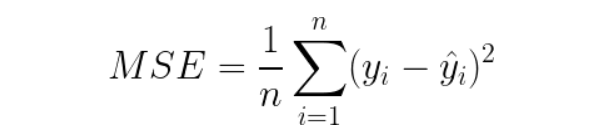

En esta fórmula, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSE se calcula tomando la diferencia entre los valores reales y los valores predichos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

Para evaluar la calidad de un modelo usando el MSE, cuanto más cerca de 0 esté el valor del MSE, mejor estará el modelo en predecir los valores deseados. Esto se debe a que un MSE de 0 indica que no hay diferencia entre los valores previstos y los valores reales, es decir, el modelo está haciendo predicciones perfectas.

Aunque el MSE es una métrica útil, vale la pena mencionar que tiene la desventaja de dar más peso a los outliers debido al cuadrado de cada término. Esto puede ser indeseable en muchos casos, llevando a los investigadores a usar alternativas, como el error absoluto medio (MAE).

La documentación de scikit-learn tiene información que ofrece más detalles sobre esta métrica en “mean_squared_error”.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Mean absolute error - MAE
El Error Absoluto Medio (MAE) es una medida de error común utilizada en modelos de regresión. Se calcula tomando la media de los valores absolutos de los errores. En otras palabras, para cada punto de datos, primero calculamos el error (la diferencia entre el valor predicho y el valor real), tomamos el valor absoluto de ese error (para asegurar que todos los errores sean positivos), y luego calculamos la media de todos estos errores absolutos. El MAE se define como:

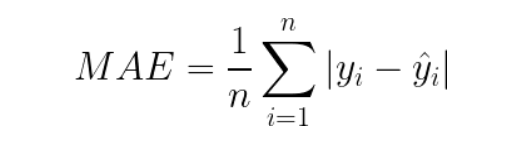

En esta ecuación, "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MAE se calcula tomando la diferencia absoluta entre los valores reales y los valores predichos para todas las observaciones, sumando estas diferencias absolutas y, a continuación, dividiendo por el número de observaciones "n".

El MAE es similar a la Métrica del Error Cuadrático Medio (MSE), pero en lugar de elevar los errores al cuadrado, simplemente toma el valor absoluto de los errores. Esto hace que el MAE sea menos sensible a outliers que el MSE, ya que los errores grandes no se amplifican por el cuadrado.

Al evaluar modelos de regresión con el MAE, un valor menor indica un modelo más preciso. En otras palabras, cuanto menor sea el MAE, mejor será el modelo en predecir el valor correcto para nuevos datos. El MAE tiene un límite inferior de 0, que indica un modelo perfecto (es decir, todas las predicciones son exactas).

Cabe destacar que, aunque el MAE es una métrica útil, no debe ser la única métrica utilizada para evaluar el rendimiento de un modelo de regresión. Otras métricas, como el MSE, la Raíz Cuadrada del Error Cuadrático Medio (RMSE) y el Coeficiente de Determinación (R2), también deben ser consideradas para obtener una evaluación completa de la capacidad de un modelo para hacer predicciones precisas.

La documentación de scikit-learn ofrece más detalles sobre esta métrica en “MAE”.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Root Mean Squared Error - RMSE
La Raíz Cuadrada del Error Cuadrático Medio (RMSE) es una métrica de evaluación comúnmente utilizada en modelos de regresión, que es esencialmente la raíz cuadrada del MSE (Error Cuadrático Medio). El RMSE se calcula tomando la raíz cuadrada de la media de los errores cuadrados, que son las diferencias entre los valores previstos y los valores reales, elevadas al cuadrado. Matemáticamente, el RMSE se define como:

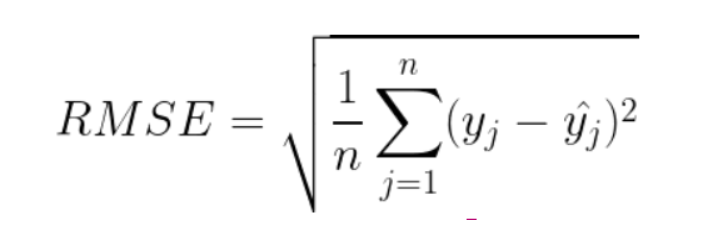

Donde:

* n es el número de muestras;
* Ŷ_j es la predicción del modelo para la muestra j;
* Y_j es el valor real para la muestra j.


El RMSE es una medida de la dispersión de los residuos (errores de predicción) y, al igual que el MSE, penaliza los errores mayores de forma más severa que los errores menores, debido al hecho de elevar al cuadrado las diferencias. Esto lo hace particularmente sensible a grandes errores.

Un valor menor de RMSE indica un mejor ajuste del modelo a los datos, es decir, las predicciones del modelo están más cerca de los valores reales. Es importante resaltar que, aunque el RMSE es una métrica útil, no debe ser la única métrica considerada al evaluar la calidad de un modelo de regresión.

Puedes acceder a la documentación de scikit-learn para saber más sobre esta métrica: metrics.mean_squared_error.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

Mean Squared Logarithmic Error - MSLE
El Error Logarítmico Cuadrático Medio es una métrica de evaluación utilizada en problemas de predicción donde la escala de los valores objetivo o de las predicciones varía significativamente y los errores relativos son más importantes que los errores absolutos. El MSLE mide el error cuadrático medio entre los logaritmos naturales de los valores reales y los logaritmos naturales de las predicciones. Matemáticamente, se puede definir el MSLE de la siguiente manera:

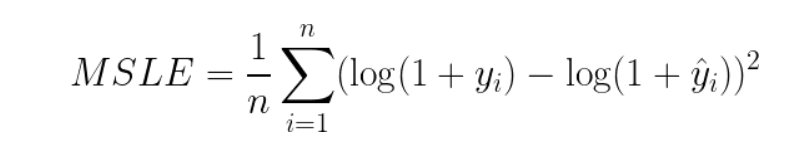

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación y "ŷ_i" es el valor predicho para la i-ésima observación. El MSLE se calcula tomando el logaritmo natural de los valores reales y predichos sumados a 1, calculando la diferencia entre estos logaritmos, elevando al cuadrado, sumando todas estas diferencias al cuadrado y, a continuación, dividiendo por el número de observaciones "n".

El principal punto de enfoque de esta métrica es medir la diferencia relativa entre los valores esperados y los predichos por el modelo, es decir, verifica la diferencia porcentual entre ellos. De modo que, pequeñas diferencias entre valores pequeños son tratadas igualmente a grandes diferencias entre valores grandes, a diferencia de lo que ocurre en el MSE, como se muestra en el siguiente ejemplo:

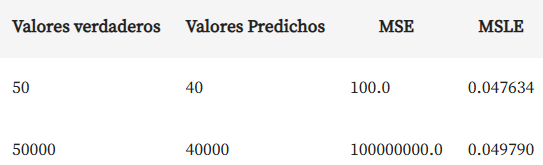

Esto nos muestra que las grandes diferencias entre los valores reales y predichos tienen poca variación en el resultado final de la métrica. Por lo tanto, esta métrica se utiliza más cuando no deseamos que grandes errores sean significativamente más penalizados que errores pequeños.

Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_squared_log_error.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error

Mean Absolute Percentage Error - MAPE
El Mean Absolute Percentage Error es muy similar al Mean Absolute Error - MAE, con la diferencia de que mide la precisión como un porcentaje y puede ser calculado como el porcentaje del MAE para cada muestra. El MAPE se utiliza mucho en problemas de regresión, ya que proporciona una interpretación bastante intuitiva sobre el error relativo. La definición del MAPE es:

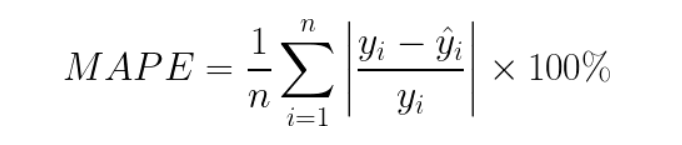

Donde "n" representa el número de observaciones o muestras, "y_i" es el valor real de la i-ésima observación, "ŷ_i" es el valor predicho para la i-ésima observación, y el MAPE se calcula como la media de los porcentajes absolutos de las diferencias entre los valores reales y los valores predichos en relación con los valores reales. El resultado se multiplica por 100% para expresar el error como un porcentaje.

El MAPE se utiliza frecuentemente como una métrica de error para evaluar la precisión de las predicciones en problemas de predicción y se expresa como un porcentaje del error medio absoluto en relación con los valores reales. Para saber más sobre esta métrica y cómo utilizarla, puedes acceder a la documentación de scikit-learn: metrics.mean_absolute_percentage_error.
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error

##Manos a la obra: otras estrategias para el DummyRegressor

Como se indica en la documentación, observamos que hay varias enfoques disponibles para implementar el DummyRegressor a través del parámetro 'strategy'. Durante el curso, optamos por la estrategia 'mean (media)', en la cual la salida corresponde a la media del conjunto de datos utilizado para el entrenamiento. Sin embargo, hasta el momento, no hemos explorado las demás estrategias disponibles.

Por lo tanto, sugerimos que pruebes las otras estrategias presentes en el parámetro strategy del DummyRegressor.

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [ ]:
estrategias = ["mean", "median", ("quantile", 0.25), ("constant", 10.0)]

resultados = {}

for estrategia in estrategias:
    if isinstance(estrategia, tuple):
        estrategia, valor = estrategia
        if estrategia == "quantile":
            model_dummy = DummyRegressor(strategy=estrategia, quantile=valor)
        else:
            model_dummy = DummyRegressor(strategy=estrategia, constant=valor)
    else:
        model_dummy = DummyRegressor(strategy=estrategia)

    model_dummy.fit(x_train, y_train)

    y_pred_dummy = model_dummy.predict(x_test)

    metricas = calcular_regresion(y_test, y_pred_dummy)

    resultados[estrategia] = metricas

for estrategia, metricas in resultados.items():
    print(f"Estrategia: {estrategia}")
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor}")
    print("\n")

Estrategia: mean
RMSE: 23.1612
MAE: 18.5646
R2: -0.0


Estrategia: median
RMSE: 23.3446
MAE: 18.4452
R2: -0.0159


Estrategia: quantile
RMSE: 28.7554
MAE: 22.0248
R2: -0.5414


Estrategia: constant
RMSE: 23.3079
MAE: 18.4449
R2: -0.0127




El DummyRegressor es una clase de scikit-learn que permite la creación de un modelo simple de referencia (o baseline) para comparación con modelos más complejos. Este modelo no toma en cuenta los datos de entrada y hace predicciones basadas en una estrategia simple especificada.

Las estrategias utilizadas en este código son: "mean", "median", ("quantile", 0.25), ("constant", 10.0). Cada una de estas estrategias define cómo el DummyRegressor hace sus predicciones:

"mean": predice la media de los valores de entrenamiento.
"median": predice la mediana de los valores de entrenamiento.
"quantile": predice un cuantil específico de los valores de entrenamiento. En el caso de este código, se utiliza el cuantil 0.25.
"constant": predice un valor constante especificado. En el caso de este código, se utiliza el valor 10.0.
El código recorre cada una de estas estrategias en un bucle, entrenando un DummyRegressor con la estrategia correspondiente y evaluando su desempeño utilizando un conjunto de métricas de regresión. Las métricas son calculadas por la función calcular_metricas_regresion.

Los resultados se almacenan en un diccionario, donde la clave es la estrategia utilizada y el valor es otro diccionario que contiene las métricas calculadas. Por último, el código imprime los resultados para cada estrategia.

##Entrada con bosques aleatorioss

In [ ]:
 from sklearn.ensemble import RandomForestRegressor

 modelo= RandomForestRegressor(max_depth=5,random_state=42)
 modelo.fit(x_train,y_train)
 y_pred=modelo.predict(x_test)
 resultado_rf=calcular_regresion(y_test,y_pred)
 resultado_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

al momento de  ussar randomfores creea varios arboles de decision y encontrar la mejor convinacion de arbole de decision para pobtener el mejor reultado a la hora de tener un modelo, a la hora de tener una previcion.


de entrada generaliso muhco mejor, solo con darle una profundidad de 5, para poder ver eto de una manera viual uaremo yellowbrick

https://www.scikit-yb.org/en/latest/api/regressor/peplot.html#quick-method

con quick method podemo ver como raionaliza el modelo

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


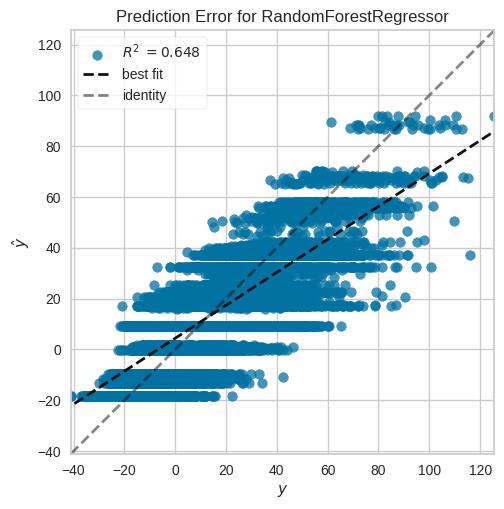

In [ ]:


from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, x_train, y_train, x_test, y_test);

La predicción de error para este regresor de Random Forest muestra que el mejor ajuste está representado por la línea negra. La línea de identidad, que es nuestra gráfica de identidad del modelo, es la que se muestra aquí.

El mejor ajuste es lo que debemos alcanzar, y por eso obtenemos este resultado en R² con las características del modelo. La recta que mejor se ajusta a nuestro conjunto de datos es la que está en negro más oscuro, mientras que la que aparece en gris es la obtenida con nuestro modelo al pasar el parámetro MaxDepth igual a 5. Es una forma interesante de visualizar.

tenemos un gráfico que nos permite ver los residuos, es decir, cuánto realmente está generalizando nuestro modelo. Vamos a utilizar de Yellowbrick este análisis de residuos.
https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


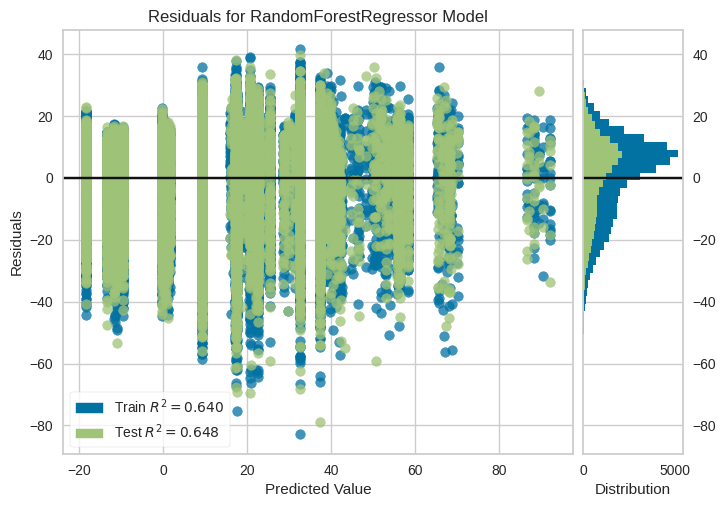

In [ ]:
#abalisi de residuo

from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, x_train, y_train, x_test, y_test);

Básicamente, los residuos son la diferencia entre mis observaciones, los datos de entrenamiento, y la línea trazada por mi modelo.

Esta línea se traza de manera que minimice la distancia de cada observación hacia ella, y esos son los residuos. Queremos que los datos de prueba tengan un comportamiento lo más similar posible a los obtenidos con el entrenamiento.

Observamos que el comportamiento de prueba fue muy cercano al de entrenamiento. La idea de observar esta distribución es que, aunque el coeficiente de determinación del entrenamiento fue del 64%, al probarlo, llegó casi al 65%.

Esto indica que el modelo está generalizando relativamente bien sin mejoras adicionales, ajustes de hiperparámetros o refinamientos. Sin embargo, no es suficiente

. Es necesario aplicar otras técnicas, como la validación cruzada, que nos permita tomar diversas muestras de nuestro conjunto de datos para verificar si el comportamiento se mantiene a lo largo de las distintas muestras o si el resultado fue producto de la aleatoriedad del modelo.

##realizanco cross validacion

hemos relaizado un modelado de bosque de datos pero solo con un conjunto para entrenamiento y otro para prueba por lo tanto tenemos la duda que nuestro modelo no esta generalizando bien con los datos de prueba


la idea de hacer la validacion cruzada es tomar datos de una parte y tomar dato de la otra parte y evaluar el modelo para ver i generaliza bien

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

en el apartado de scorein auqnue pongamo lo mismos elementess que la ve paada los recurrsos de sklearn demandan una funcion de utilidad, entre mayor ea el error que calcula mejor sera el modelo a diferencia de las funciones anteriores que estabamos usando funciones de costo, entre menor el error mejor funciona nuestro modelo, pero ahora queremos maximisar el error po rlo tanto usaremos la version negativa "neg_root_mean_squere_error"

In [ ]:
from sklearn.model_selection import KFold,cross_validate
scoring={
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_squared_error',
    'R2':'r2'

}
cv=KFold(n_splits=5, shuffle=True, random_state=42)
cv_results=cross_validate(modelo, x_train, y_train, scoring=scoring, cv=cv)
cv_results

{'fit_time': array([1.94124627, 1.94203258, 1.91399312, 1.93428779, 2.34310699]),
 'score_time': array([0.03675914, 0.03739834, 0.03685141, 0.03584456, 0.04777861]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-189.61007664, -192.35703119, -195.1071661 , -191.91874247,
        -195.70709737]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

al realizar la validacion crusada y comprar los reultados con lo anteriores vemoss que si hay una consistencia en los ressultados es decir siguen en el mismoss paremetro e intervalo, aunque estos presentan una variacion leve son coincitente, lo que nos dice que nuestro modelo generalisa bien pero que aun hay variacion ademas de que hata qui no se han ajustado ningun hiperparametro parametro en nuetro estimador solo le hemos dado una profundidad

#lo que aprendimo

En esta clase, aprendiste a:
* Construir un modelo de machine learning como baseline;
* Evaluar el modelo de baseline de acuerdo con las métricas RMSE, MAE y R2;
* Superar el modelo de baseline con un modelo más complejo (RandomForestRegressor);
* Evaluar el RandomForestRegressor gráficamente y con las métricas RMSE, MAE y R2;
* Realizar la validación cruzada con el RandomForestRegressor.

#04._optimizacion de hiperparametros

Feature importancess

In [ ]:
 df.columns

Index(['schengen', 'arrival_time', 'is_holiday', 'delay', 'is_weekend',
       'airline_BZ', 'airline_MM', 'airline_YE', 'aircraft_type_Airbus A320',
       'aircraft_type_Airbus A330', 'aircraft_type_Boeing 737',
       'aircraft_type_Boeing 777', 'aircraft_type_Boeing 787',
       'aircraft_type_Embraer E175', 'origin_AUZ', 'origin_CNU', 'origin_CSF',
       'origin_EMM', 'origin_FJB', 'origin_MWL', 'origin_PUA', 'origin_TCY',
       'origin_TZF', 'origin_ZQO', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'],
      dtype='object')

In [ ]:
len(df.columns)

31

usaremos el atributo feature_importanc que nos devuelve un numpy array con la importancia en porcentaje de cada feature

In [ ]:
importances=modelo.feature_importances_

In [ ]:
feature_importances=pd.DataFrame({'Feature':x.columns,'Importances':(importances*100).round(2)}).sort_values('Importances',ascending=False)
feature_importances

,Feature,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [ ]:
resultado=pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature=RandomForestRegressor(max_depth=5,random_state=42)
ct_features=[i if i !=0 else 1 for i in range(0,35,5)]

creamo una lita que comienza en 1, i i es diferente de 0 e coloca 1, en cao contrario e hace un rango

In [ ]:
[i if i !=0 else 1 for i in range(0,35,5)]

[1, 5, 10, 15, 20, 25, 30]

lo que harai eria creando 1 feature, 5 feature, etc.

nuestro dataframe hara una iteracion cada una de las categorias de acuerdo a cada una de nuestra lista de importancia

In [ ]:
for i in ct_features:
  selected_features=feature_importances['Feature'].values[:i]#tomaremos todo los valores hata i
  x_train_sel=x_train[selected_features]
  x_test_sel=x_test[selected_features]
  model_feature.fit(x_train_sel,y_train)
  y_pred=model_feature.predict(x_test_sel)
  metricas=calcular_regresion(y_test,y_pred)
  resultados[i]=list(metricas.values())
# Convertir a DataFrame solo las llaves numéricas (las que representan las columnas)
metricas = ["RMSE", "MAE", "R2"]
datos = {k: v for k, v in resultados.items() if isinstance(k, int)}
resultados=pd.DataFrame(datos, index=metricas)



In [ ]:
resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


apartir de 15 feature se estabiliza enotnces no hay que poner mas feature de 15

In [ ]:
resultado=pd.DataFrame(index=['RMSE','MAE','R2'])
model_feature=RandomForestRegressor(max_depth=5,random_state=42)
ct_features= range(10,16)

for i in ct_features:
  selected_features=feature_importances['Feature'].values[:i]#tomaremos todo los valores hata i
  x_train_sel=x_train[selected_features]
  x_test_sel=x_test[selected_features]
  model_feature.fit(x_train_sel,y_train)
  y_pred=model_feature.predict(x_test_sel)
  metricas=calcular_regresion(y_test,y_pred)
  resultados[i]=list(metricas.values())
# Convertir a DataFrame solo las llaves numéricas (las que representan las columnas)
metricas = ["RMSE", "MAE", "R2"]
datos = {k: v for k, v in resultados.items() if isinstance(k, int)}
resultados=pd.DataFrame(datos, index=metricas)
resultados.drop(columns=[1,5,20,25,30,])

,10,15,11,12,13,14
RMSE,13.7587,13.7497,13.7564,13.7526,13.7526,13.7497
MAE,11.0422,11.0285,11.0425,11.0312,11.0314,11.0285
R2,0.6471,0.6476,0.6472,0.6474,0.6474,0.6476


con esta evaluacion vemos la mejoria en las metrica y tiene centido que lo dejemo en solo 13 features

In [ ]:
selected_features=feature_importances['Feature'].values[:13]#tomaremos todo los valores hata i
x_selected_features=x[selected_features]
x_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


aqui tenemos la 13 features ma importante de mi conjunto de dato

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_selected_features,y,random_state=42)

con esto ya tenemos el conjuntod e dato y de prueba para ajustar nuetro hiperparametros

##Optimizando hiperparametros con gridsearchCV

esta nos permite una busqueda exaustiva de los parametros especificados para un estimador

In [ ]:
from sklearn.model_selection import GridSearchCV

los parametros que vamos a utilizar son la profundidad maxima, minimo de meustras de hojas,minimo de muestras , y el numero de estimadores, con esto va hacer las diferentes convinaciones

In [ ]:
param_grid={
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

con estos params grid podemos empezar para saber cual es el mejor estimador

usamos randonforestregressor con un solo parametro, con param_grid, un scoring de solo el coeficiente de regresion para agilisar el parametro, y la validacion crusada que es cv, siedno esto los unicos parametros

In [ ]:
cv=KFold(n_splits=5, shuffle=True, random_state=42)#validacion crusada
#modelgril donde procederemos a probar todos los parametros
model_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                          param_grid=param_grid, scoring='r2',
                          cv=cv)

model_grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
#para saber el mejor estimador
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

ahora vemos que los mejores parametros de nuestro modelo

In [ ]:
#visualizacion de los parametros y la manera que racionalizo
y_pred_grid=model_grid.predict(x_test)
metricas_model_grid=calcular_regresion(y_test,y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

al revisar los parametros vemos que el coeficiente de determinacion ya esta a mas del 67% el error absoluto promedio bajo, y el rute midle squere error a 13.23

In [ ]:
#comparacion de resultados
resultados['modelo_grid']=list(metricas_model_grid.values())
resultados.drop(columns=[1,5,20,25,30,])

,10,15,11,12,13,14,modelo_grid
RMSE,13.7587,13.7497,13.7564,13.7526,13.7526,13.7497,13.2308
MAE,11.0422,11.0285,11.0425,11.0312,11.0314,11.0285,10.6296
R2,0.6471,0.6476,0.6472,0.6474,0.6474,0.6476,0.6754


"Con esto, ya tenemos nuestro modelo de previsión con métricas muy interesantes. ¿Qué significa esta métrica? Que si introducimos al modelo información que contenga la aerolínea, si es feriado, el tipo de aerolínea, y otros atributos, nos proporcionará un resultado con un error de 13 minutos, un error promedio absoluto de 10 minutos de atraso, y tendrá la capacidad de explicar la variable de respuesta en más del 67%. Nos veremos en el próximo vídeo para despedirnos."

al revisar los datos vemos que tuvimos un resutlado de mejora continua dado que con estos parametros y estas feature con el tratamiento el modelo quedo mucho mejor

#### hiperparametros del randonforestregressor

El RandomForestRegressor es un modelo de conjunto que combina varios árboles de decisión para hacer predicciones más robustas y precisas a través de la técnica de Bagging.

Los hiperparámetros son configuraciones que puedes ajustar para controlar el comportamiento del RandomForestRegressor. A continuación, se presenta una lista de los principales hiperparámetros:

1 - n_estimators:

Este hiperparámetro especifica el número de árboles de decisión que se crearán en el bosque aleatorio. Cuanto mayor sea el número de estimadores, mayor será la capacidad del modelo para ajustarse a los datos. Sin embargo, un número muy alto puede llevar a un aumento en el tiempo de entrenamiento.

2 - criterion:

El hiperparámetro criterion determina la función de medición de la calidad de una división durante la construcción de los árboles. Para regresión, el valor predeterminado es "mse" (Error Cuadrático Medio), que calcula la media de los cuadrados de los errores. Otra opción es "mae" (Error Absoluto Medio), que utiliza la media de los valores absolutos de los errores.

3 - max_depth:

Este hiperparámetro controla la profundidad máxima de los árboles de decisión en el bosque. Limitar la profundidad puede ayudar a evitar el sobreajuste, ya que impide que los árboles se ajusten demasiado a los datos de entrenamiento y no puedan hacer buenas predicciones para nuevos datos.

4 - min_samples_split:

El min_samples_split determina el número mínimo de muestras necesarias para dividir un nodo interno del árbol. Esto ayuda a controlar el crecimiento de los árboles y evita divisiones que llevan a nodos con pocas muestras.
5 - min_samples_leaf:

Este hiperparámetro define el número mínimo de muestras requeridas en una hoja (nodo terminal) del árbol. Esto ayuda a controlar la granularidad del árbol y puede impedir que las hojas contengan muy pocas muestras.
6 - max_features:

max_features especifica el número máximo de características a considerar al buscar la mejor división en cada nodo. Los valores comunes incluyen "auto" (sqrt(n_features)), "sqrt" (también sqrt(n_features)), "log2" (log2(n_features)), o un número entero que representa la cantidad exacta de características a considerar.

7 - random_state:

Este hiperparámetro define una semilla para el generador de números aleatorios utilizado para crear el bosque aleatorio. Definir un valor fijo para random_state garantiza que el modelo sea reproducible.

8 - n_jobs:

n_jobs especifica el número de núcleos de CPU a utilizar para el entrenamiento en paralelo. Si se define como -1, se utilizarán todos los núcleos disponibles.
Estos son algunos de los principales hiperparámetros del RandomForestRegressor en scikit-learn. La elección adecuada de estos hiperparámetros puede afectar significativamente el rendimiento y la capacidad de generalización del modelo para tareas de regresión. Para consultar los otros hiperparámetros faltantes, puedes consultar la documentación oficial de scikit-learn.

#Serializando el modelo

In [ ]:
import pickle


In [ ]:
try:
  with open('champion.pkl','wb')as file:
    pickle.dump(model_grid.best_estimator_,file)
  print('Modelo serializado con exito')
except Exception as e:
  print('se presento un error al almacenar el modelo',str(e))

Modelo serializado con exito


leyendo el modelo: utilizando el modelo guardado

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [ ]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Donde los valores corresponden a:



```
schengen: 0
arrival_time: 10.8941
is_holiday: 0
is_weekend: 0
airline_BZ: 0
airline_MM: 0
airline_YE: 1
aircraft_type_Airbus A320: 1
aircraft_type_Airbus A330: 0
aircraft_type_Boeing 737: 0
aircraft_type_Boeing 777: 0
aircraft_type_Boeing 787: 0
aircraft_type_Embraer E175: 0
```



In [ ]:
file_path='/content/champion.pkl'
try:
  with open(file_path, 'rb')as file:
    model=pickle.load(file)
  print('Modelo cargado con exito')
except Exception as e:
  print('se presento un error al cargar el modelo',str(e))

Modelo cargado con exito


In [95]:
import numpy as np
# Predicción
# Ensure the input has the correct shape (2D array)
nueva_muestra_reshaped = np.array(nueva_muestra).reshape(1, -1)
prediccion = model.predict(nueva_muestra_reshaped)[0]  # Valor en minutos

# Formato tiempo en h, m, s
horas = int(prediccion // 60)
minutos = int(prediccion % 60)
segundos = int(round((prediccion - int(prediccion)) * 60))

# Intervalo estimado +-10%
lower = prediccion * 0.9
upper = prediccion * 1.1

print(f"Predicción original (en minutos): {prediccion:.4f}")
print(f"Tiempo estimado: {horas}h {minutos}m {segundos}s")
print(f"Intervalo estimado: {lower:.2f} min - {upper:.2f} min")

Predicción original (en minutos): 48.7332
Tiempo estimado: 0h 48m 44s
Intervalo estimado: 43.86 min - 53.61 min


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


el modelo nos predice que el tiempo de retraso es de 48 minutos con 73 segundos

#Lo que aprendimos

En esta clase, aprendiste a:
Seleccionar las características más importantes para el modelo;
Volver a entrenar el modelo con las características más importantes sin perder rendimiento;
Realizar la optimización de hiperparámetros del modelo utilizando GridSearchCV;
Guardar el modelo construido.

In [ ]:
pip install skl2onnx onnx onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.5 MB/s eta 0:00:00


In [ ]:
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# 1. Cargar el modelo
model = joblib.load("champion.pkl")

# 2. Definir la forma de entrada (n_features = 13 en tu ejemplo)
initial_type = [('input', FloatTensorType([None, 13]))]

# 3. Convertir a ONNX
onnx_model = convert_sklearn(model, initial_types=initial_type)

# 4. Guardar el modelo ONNX
with open("champion.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Modelo exportado a champion.onnx")


Modelo exportado a champion.onnx


In [ ]:
import onnxruntime as rt
import numpy as np

# Cargar el modelo ONNX
onnx_model_path = "champion.onnx"  # Ruta donde está tu modelo
sess = rt.InferenceSession(onnx_model_path)

# Verificar nombres de entrada
input_name = sess.get_inputs()[0].name
print("Nombre de la entrada:", input_name)

# Preparar la nueva muestra
nueva_muestra = np.array([[0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=np.float32)

# Hacer la predicción
prediccion = sess.run(None, {input_name: nueva_muestra})
print("Predicción:", prediccion)

Nombre de la entrada: input
Predicción: [array([[48.733215]], dtype=float32)]


In [ ]:
import onnxruntime as rt
import numpy as np

# Ruta del modelo ONNX
onnx_model_path = "champion.onnx"

# Cargar sesión ONNX
sess = rt.InferenceSession(onnx_model_path)
input_name = sess.get_inputs()[0].name

# Nueva muestra (tu ejemplo)
nueva_muestra = np.array([[0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], dtype=np.float32)

# Predicción
prediccion = sess.run(None, {input_name: nueva_muestra})[0][0][0]  # Extraer el valor
print(f"Predicción original (en minutos): {prediccion:.4f}")

# Convertir a horas:minutos:segundos
total_seconds = prediccion * 60
hours = int(total_seconds // 3600)
minutes = int((total_seconds % 3600) // 60)
seconds = int(total_seconds % 60)

print(f"Tiempo estimado: {hours}h {minutes}m {seconds}s")

# Intervalo de confianza aproximado (±10%)
lower = prediccion * 0.9
upper = prediccion * 1.1
print(f"Intervalo estimado: {lower:.2f} min - {upper:.2f} min")


Predicción original (en minutos): 48.7332
Tiempo estimado: 0h 48m 43s
Intervalo estimado: 43.86 min - 53.61 min
